# TENSORS

In [209]:
import tensorflow as tf

In [212]:
x = tf.constant([[1.,2.,3.], [4.,5.,6.]])

In [213]:
x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [214]:
x.dtype

tf.float32

In [215]:
x+x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [216]:
5*x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 5., 10., 15.],
       [20., 25., 30.]], dtype=float32)>

In [218]:
x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [217]:
x @ tf.transpose(x)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [221]:
tf.concat([x,x,x], axis = 0)

<tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.],
       [1., 2., 3.],
       [4., 5., 6.],
       [1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [222]:
tf.concat([x,x,x], axis = 1)

<tf.Tensor: shape=(2, 9), dtype=float32, numpy=
array([[1., 2., 3., 1., 2., 3., 1., 2., 3.],
       [4., 5., 6., 4., 5., 6., 4., 5., 6.]], dtype=float32)>

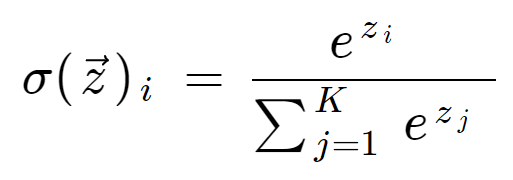

In [223]:
tf.nn.softmax(x, axis = -1) # softmax hesabi normalde yukaidaki gibi, alt taraf her sayi icin hesaplanir

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.09003057, 0.24472848, 0.66524094],
       [0.09003057, 0.24472848, 0.66524094]], dtype=float32)>

In [225]:
tf.reduce_sum(x)

<tf.Tensor: shape=(), dtype=float32, numpy=21.0>

In [226]:
if tf.config.list_physical_devices('GPU'):
  print("TensorFlow **IS** using the GPU")
else:
  print("TensorFlow **IS NOT** using the GPU")

TensorFlow **IS NOT** using the GPU


# Variables

Normal tf.Tensor objects are immutable. To store model weights (or other mutable state) in TensorFlow use a tf.Variable.

In [235]:
var = tf.Variable([0.0,0.0,0.0])

In [236]:
var.assign([1,2,3])

<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [238]:
var.assign_add([1,1,1])

<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([2., 3., 4.], dtype=float32)>

In [239]:
var

<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([2., 3., 4.], dtype=float32)>

# Automatic differentiation

In [240]:
x =tf.Variable(1.0)
def f(x):
    y = x**2 + 2*x - 5
    return y

In [241]:
f(x)

<tf.Tensor: shape=(), dtype=float32, numpy=-2.0>

In [243]:
with tf.GradientTape() as tape :
    y = f(x)
g_x = tape.gradient(y,x) # g(x) = dy/dx, otomatik turevi hesapladi
g_x

<tf.Tensor: shape=(), dtype=float32, numpy=4.0>

# Graphs and tf.function

While you can use TensorFlow interactively like any Python library, TensorFlow also provides tools for:
<li><b>Performance optimization</b>: to speed up training and inference.
<li><b>Export</b>: so you can save your model when it's done training.
These require that you use tf.function to separate your pure-TensorFlow code from Python.

In [248]:
@tf.function
def my_func(x):
    print('Tracing.\n')
    return tf.reduce_sum(x)

In [249]:
x = tf.constant([1,2,3])
my_func(x)

Tracing.



<tf.Tensor: shape=(), dtype=int32, numpy=6>

In [251]:
@tf.function
def my_func(x):
    print('Tracing.\n')
    return tf.reduce_sum(x)

In [252]:
x = tf.constant([10,9,8]) 
my_func(x) # hemen func4in pesinden gelirse func isleme aliyor kabul eder aksi halde aradaki print(i yazdirmiyor)

Tracing.



<tf.Tensor: shape=(), dtype=int32, numpy=27>

On subsequent calls TensorFlow only executes the optimized graph, skipping any non-TensorFlow steps. Below, note that my_func doesn't print tracing since print is a Python function, not a TensorFlow function.

In [253]:
x = tf.constant([10,9,8]) 
my_func(x)

<tf.Tensor: shape=(), dtype=int32, numpy=27>

A graph may not be reusable for inputs with a different signature (shape and dtype), so a new graph is generated instead:

In [254]:
x = tf.constant([10.0, 9.1, 8.2], dtype=tf.float32)
my_func(x)

Tracing.



<tf.Tensor: shape=(), dtype=float32, numpy=27.3>

# Modules, layers, and models

tf.Module is a class for managing your tf.Variable objects, and the tf.function objects that operate on them. The tf.Module class is necessary to support two significant features:

<li>You can save and restore the values of your variables using tf.train.Checkpoint. This is useful during training as it is quick to save and restore a model's state.
<li>You can import and export the tf.Variable values and the tf.function graphs using tf.saved_model. This allows you to run your model independently of the Python program that created it.
Here is a complete example exporting a simple tf.Module object:

In [255]:
class MyModule(tf.Module):
  def __init__(self, value):
    self.weight = tf.Variable(value)

  @tf.function
  def multiply(self, x):
    return x * self.weight

In [256]:
mod = MyModule(3)
mod.multiply(tf.constant([1, 2, 3]))

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 6, 9], dtype=int32)>

In [ ]:
# save the model

In [257]:
save_path = './saved'
tf.saved_model.save(mod, save_path)

INFO:tensorflow:Assets written to: ./saved/assets


In [258]:
reloaded = tf.saved_model.load(save_path)
reloaded.multiply(tf.constant([1, 2, 3]))

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 6, 9], dtype=int32)>

# Training loops

In [259]:
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams['figure.figsize'] = [9, 6]

In [262]:
x = tf.linspace(-2, 2, 201)
x = tf.cast(x, tf.float32)
x

<tf.Tensor: shape=(201,), dtype=float32, numpy=
array([-2.  , -1.98, -1.96, -1.94, -1.92, -1.9 , -1.88, -1.86, -1.84,
       -1.82, -1.8 , -1.78, -1.76, -1.74, -1.72, -1.7 , -1.68, -1.66,
       -1.64, -1.62, -1.6 , -1.58, -1.56, -1.54, -1.52, -1.5 , -1.48,
       -1.46, -1.44, -1.42, -1.4 , -1.38, -1.36, -1.34, -1.32, -1.3 ,
       -1.28, -1.26, -1.24, -1.22, -1.2 , -1.18, -1.16, -1.14, -1.12,
       -1.1 , -1.08, -1.06, -1.04, -1.02, -1.  , -0.98, -0.96, -0.94,
       -0.92, -0.9 , -0.88, -0.86, -0.84, -0.82, -0.8 , -0.78, -0.76,
       -0.74, -0.72, -0.7 , -0.68, -0.66, -0.64, -0.62, -0.6 , -0.58,
       -0.56, -0.54, -0.52, -0.5 , -0.48, -0.46, -0.44, -0.42, -0.4 ,
       -0.38, -0.36, -0.34, -0.32, -0.3 , -0.28, -0.26, -0.24, -0.22,
       -0.2 , -0.18, -0.16, -0.14, -0.12, -0.1 , -0.08, -0.06, -0.04,
       -0.02,  0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,
        0.16,  0.18,  0.2 ,  0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,
        0.34,  0.36,  0.38,  0.4 ,  0.42, 

In [274]:
Z = tf.constant([1.8, 2.2], dtype=tf.float32)
tf.cast(Z, tf.int32)  # [1, 2], dtype=tf.int32

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 2], dtype=int32)>

In [265]:
def f(x):
  y = x**2 + 2*x - 5
  return y

In [281]:
y = f(x) + tf.random.normal(shape=[201])

In [282]:
y.numpy()

array([-4.3435135 , -5.4526515 , -4.738425  , -6.122027  , -4.4509373 ,
       -6.590864  , -6.123408  , -5.6089616 , -6.2533064 , -4.132752  ,
       -4.509295  , -5.700386  , -5.108506  , -5.034731  , -4.4186945 ,
       -5.5385804 , -5.422595  , -6.357416  , -6.38485   , -4.6620045 ,
       -5.134161  , -4.944126  , -5.4627686 , -8.57341   , -5.184997  ,
       -6.6340394 , -6.087063  , -5.0649176 , -6.042029  , -4.7213545 ,
       -5.533582  , -5.464571  , -7.113071  , -5.605387  , -6.6231117 ,
       -4.9253283 , -7.732475  , -4.1950965 , -5.2154093 , -5.2657266 ,
       -4.7015266 , -5.933867  , -6.6917048 , -7.244476  , -6.5351715 ,
       -5.694005  , -6.0956926 , -6.497624  , -5.3591022 , -3.5010128 ,
       -6.5975056 , -5.91506   , -5.5171757 , -6.4015512 , -4.8323855 ,
       -6.780216  , -4.4879684 , -6.2358565 , -5.8213577 , -6.1437774 ,
       -6.566848  , -5.2929373 , -7.670784  , -4.6911116 , -5.6498075 ,
       -5.8896675 , -7.7888937 , -6.543842  , -4.9019566 , -6.70

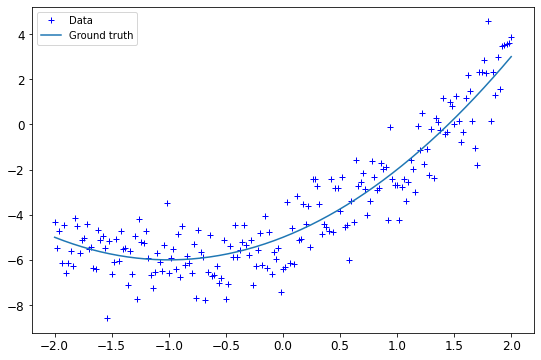

In [283]:
plt.plot(x.numpy(), y.numpy(), 'b+', label='Data')
plt.plot(x, f(x),  label='Ground truth')
plt.legend();

# Create a model:

In [296]:
class Model(tf.keras.Model):
  def __init__(self, units):
    super().__init__()
    self.dense1 = tf.keras.layers.Dense(units=units,
                                        activation=tf.nn.relu,
                                        kernel_initializer=tf.random.normal,
                                        bias_initializer=tf.random.normal)
    self.dense2 = tf.keras.layers.Dense(1)

  def call(self, x, training=True):
    # For Keras layers/models, implement `call` instead of `__call__`.
    print(x)
    x = x[:, tf.newaxis]
    print(x)
    x = self.dense1(x)
    x = self.dense2(x)
    return tf.squeeze(x, axis=1) # y ekseninden boyut cikarmak icin kullanilir

In [297]:
model = Model(64)

In [302]:
a = tf.linspace(1,10,100)
print(a)
a = a[:,tf.newaxis]
a = a[:,tf.newaxis]
a

tf.Tensor(
[ 1.          1.09090909  1.18181818  1.27272727  1.36363636  1.45454545
  1.54545455  1.63636364  1.72727273  1.81818182  1.90909091  2.
  2.09090909  2.18181818  2.27272727  2.36363636  2.45454545  2.54545455
  2.63636364  2.72727273  2.81818182  2.90909091  3.          3.09090909
  3.18181818  3.27272727  3.36363636  3.45454545  3.54545455  3.63636364
  3.72727273  3.81818182  3.90909091  4.          4.09090909  4.18181818
  4.27272727  4.36363636  4.45454545  4.54545455  4.63636364  4.72727273
  4.81818182  4.90909091  5.          5.09090909  5.18181818  5.27272727
  5.36363636  5.45454545  5.54545455  5.63636364  5.72727273  5.81818182
  5.90909091  6.          6.09090909  6.18181818  6.27272727  6.36363636
  6.45454545  6.54545455  6.63636364  6.72727273  6.81818182  6.90909091
  7.          7.09090909  7.18181818  7.27272727  7.36363636  7.45454545
  7.54545455  7.63636364  7.72727273  7.81818182  7.90909091  8.
  8.09090909  8.18181818  8.27272727  8.36363636  8.4545

<tf.Tensor: shape=(100, 1, 1), dtype=float64, numpy=
array([[[ 1.        ]],

       [[ 1.09090909]],

       [[ 1.18181818]],

       [[ 1.27272727]],

       [[ 1.36363636]],

       [[ 1.45454545]],

       [[ 1.54545455]],

       [[ 1.63636364]],

       [[ 1.72727273]],

       [[ 1.81818182]],

       [[ 1.90909091]],

       [[ 2.        ]],

       [[ 2.09090909]],

       [[ 2.18181818]],

       [[ 2.27272727]],

       [[ 2.36363636]],

       [[ 2.45454545]],

       [[ 2.54545455]],

       [[ 2.63636364]],

       [[ 2.72727273]],

       [[ 2.81818182]],

       [[ 2.90909091]],

       [[ 3.        ]],

       [[ 3.09090909]],

       [[ 3.18181818]],

       [[ 3.27272727]],

       [[ 3.36363636]],

       [[ 3.45454545]],

       [[ 3.54545455]],

       [[ 3.63636364]],

       [[ 3.72727273]],

       [[ 3.81818182]],

       [[ 3.90909091]],

       [[ 4.        ]],

       [[ 4.09090909]],

       [[ 4.18181818]],

       [[ 4.27272727]],

       [[ 4.36363636]]

tf.Tensor(
[-2.   -1.98 -1.96 -1.94 -1.92 -1.9  -1.88 -1.86 -1.84 -1.82 -1.8  -1.78
 -1.76 -1.74 -1.72 -1.7  -1.68 -1.66 -1.64 -1.62 -1.6  -1.58 -1.56 -1.54
 -1.52 -1.5  -1.48 -1.46 -1.44 -1.42 -1.4  -1.38 -1.36 -1.34 -1.32 -1.3
 -1.28 -1.26 -1.24 -1.22 -1.2  -1.18 -1.16 -1.14 -1.12 -1.1  -1.08 -1.06
 -1.04 -1.02 -1.   -0.98 -0.96 -0.94 -0.92 -0.9  -0.88 -0.86 -0.84 -0.82
 -0.8  -0.78 -0.76 -0.74 -0.72 -0.7  -0.68 -0.66 -0.64 -0.62 -0.6  -0.58
 -0.56 -0.54 -0.52 -0.5  -0.48 -0.46 -0.44 -0.42 -0.4  -0.38 -0.36 -0.34
 -0.32 -0.3  -0.28 -0.26 -0.24 -0.22 -0.2  -0.18 -0.16 -0.14 -0.12 -0.1
 -0.08 -0.06 -0.04 -0.02  0.    0.02  0.04  0.06  0.08  0.1   0.12  0.14
  0.16  0.18  0.2   0.22  0.24  0.26  0.28  0.3   0.32  0.34  0.36  0.38
  0.4   0.42  0.44  0.46  0.48  0.5   0.52  0.54  0.56  0.58  0.6   0.62
  0.64  0.66  0.68  0.7   0.72  0.74  0.76  0.78  0.8   0.82  0.84  0.86
  0.88  0.9   0.92  0.94  0.96  0.98  1.    1.02  1.04  1.06  1.08  1.1
  1.12  1.14  1.16  1.18  1.2   1.22  1.24 

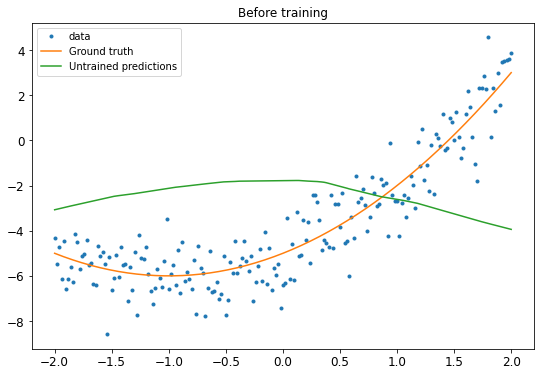

In [298]:
plt.plot(x.numpy(), y.numpy(), '.', label='data')
plt.plot(x, f(x),  label='Ground truth')
plt.plot(x, model(x), label='Untrained predictions')
plt.title('Before training')
plt.legend();

# Write a basic training loop

In [287]:
variables = model.variables

optimizer = tf.optimizers.SGD(learning_rate=0.01)

for step in range(1000):
  with tf.GradientTape() as tape:
    prediction = model(x)
    error = (y-prediction)**2
    mean_error = tf.reduce_mean(error)
  gradient = tape.gradient(mean_error, variables)
  optimizer.apply_gradients(zip(gradient, variables))

  if step % 100 == 0:
    print(f'Mean squared error: {mean_error.numpy():0.3f}')

Mean squared error: 22.250
Mean squared error: 1.161
Mean squared error: 1.144
Mean squared error: 1.132
Mean squared error: 1.121
Mean squared error: 1.111
Mean squared error: 1.103
Mean squared error: 1.095
Mean squared error: 1.089
Mean squared error: 1.084


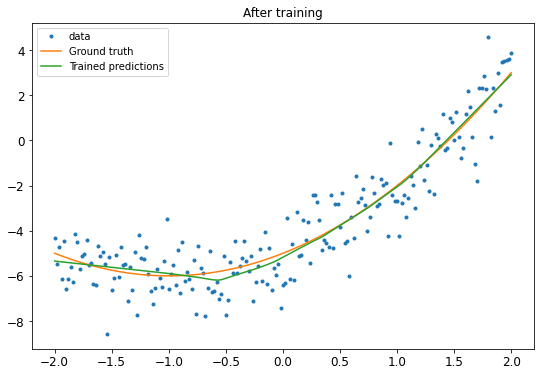

In [288]:
plt.plot(x.numpy(),y.numpy(), '.', label="data")
plt.plot(x, f(x),  label='Ground truth')
plt.plot(x, model(x), label='Trained predictions')
plt.title('After training')
plt.legend();

That's working, but remember that implementations of common training utilities are available in the tf.keras module. So consider using those before writing your own. To start with, the Model.compile and Model.fit methods implement a training loop for you:

In [292]:
new_model = Model(64)

In [294]:
new_model.compile(
    loss=tf.keras.losses.MSE,
    optimizer=tf.optimizers.SGD(learning_rate=0.01))

history = new_model.fit(x, y,
                        epochs=100,
                        batch_size=32,
                        verbose=0)

model.save('./my_model')

INFO:tensorflow:Assets written to: ./my_model/assets


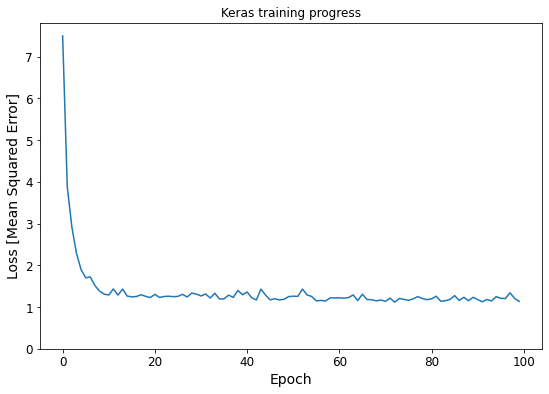

In [295]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylim([0, max(plt.ylim())])
plt.ylabel('Loss [Mean Squared Error]')
plt.title('Keras training progress');

# Creating and running a graph

In [204]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 1.x
except Exception:
    pass

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.compat.v1.reset_default_graph()
    tf.compat.v1.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "tensorflow"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [205]:
import tensorflow as tf

reset_graph()

x = tf.Variable(3, name="x")
y = tf.Variable(4, name="y")
f = x*x*y + y + 2

In [208]:
f

<tf.Tensor: shape=(), dtype=int32, numpy=42>

In [188]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.7.0'

In [189]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.7.0'

In [190]:
keras.__version__

'2.7.0'

In [191]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [192]:
X_train_full.shape

(60000, 28, 28)

In [193]:
y_train_full.shape

(60000,)

In [194]:
X_train_full.dtype

dtype('uint8')

In [195]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [196]:
X_valid.shape

(5000, 28, 28)

In [197]:
y_train[:5]

array([4, 0, 7, 9, 9], dtype=uint8)

In [198]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                   "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [11]:
class_names[y_train[0]]

'Coat'

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28])) # it receives input data X, it computes X.reshape(-1, 1)
model.add(keras.layers.Dense(300, activation="relu")) #  we add a Dense hidden layer with 300 neurons.
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


In [13]:
# model = keras.models.Sequential([
  #      keras.layers.Flatten(input_shape=[28, 28]),
  #      keras.layers.Dense(300, activation="relu"),
  #      keras.layers.Dense(100, activation="relu"),
  #      keras.layers.Dense(10, activation="softmax")
#])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.layers

In [16]:
model.layers[2].name

'dense_1'

In [17]:
model.get_layer('dense_2').name

'dense_2'

In [18]:
hidden1 = model.layers[1]

In [19]:
weights, biases = hidden1.get_weights()

In [20]:
weights

array([[-0.02138914, -0.00593305, -0.02276655, ..., -0.04439222,
         0.05398969, -0.05559881],
       [-0.0213206 , -0.05788392, -0.03593682, ...,  0.04616209,
        -0.0375794 , -0.05774058],
       [-0.04674159, -0.04997181,  0.01036356, ...,  0.00587729,
        -0.00218701, -0.06571572],
       ...,
       [-0.00984559,  0.04020487,  0.06031366, ...,  0.02801578,
        -0.01950876,  0.04514468],
       [ 0.0197401 , -0.02273982,  0.06646113, ...,  0.03190576,
         0.04804739,  0.0162516 ],
       [-0.03632574, -0.03081165, -0.04966225, ...,  0.03105595,
        -0.06695148,  0.07193033]], dtype=float32)

In [21]:
weights.shape

(784, 300)

In [22]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [23]:
model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics = ["accuracy"])

In [25]:
history  = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7194 - accuracy: 0.7671 - val_loss: 0.5302 - val_accuracy: 0.8180
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4916 - accuracy: 0.8294 - val_loss: 0.4390 - val_accuracy: 0.8516
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4444 - accuracy: 0.8448 - val_loss: 0.4222 - val_accuracy: 0.8524
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4167 - accuracy: 0.8536 - val_loss: 0.3934 - val_accuracy: 0.8664
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3965 - accuracy: 0.8607 - val_loss: 0.3755 - val_accuracy: 0.8706
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3806 - accuracy: 0.8657 - val_loss: 0.3779 - val_accuracy: 0.8714
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3679 - accuracy: 0.8704 - val_loss: 0.3642 - val_accuracy:

In [27]:
history.history

{'loss': [0.7194092869758606,
  0.4916449785232544,
  0.44440793991088867,
  0.41667136549949646,
  0.39651310443878174,
  0.3806292712688446,
  0.3679451048374176,
  0.35581639409065247,
  0.34719353914260864,
  0.33804652094841003,
  0.3293687403202057,
  0.32217156887054443,
  0.31440824270248413,
  0.3083896338939667,
  0.3017886281013489,
  0.29551854729652405,
  0.2891560196876526,
  0.2835943400859833,
  0.27808454632759094,
  0.2734856605529785,
  0.2687702178955078,
  0.26359084248542786,
  0.2595088481903076,
  0.25467637181282043,
  0.2500359117984772,
  0.24587465822696686,
  0.24211661517620087,
  0.23736700415611267,
  0.2337890863418579,
  0.23092283308506012],
 'accuracy': [0.7671454548835754,
  0.8294363617897034,
  0.8447636365890503,
  0.8535818457603455,
  0.8607272505760193,
  0.8656545281410217,
  0.8704181909561157,
  0.8736727237701416,
  0.8764363527297974,
  0.8796727061271667,
  0.8823999762535095,
  0.8843636512756348,
  0.887109100818634,
  0.88812726736068

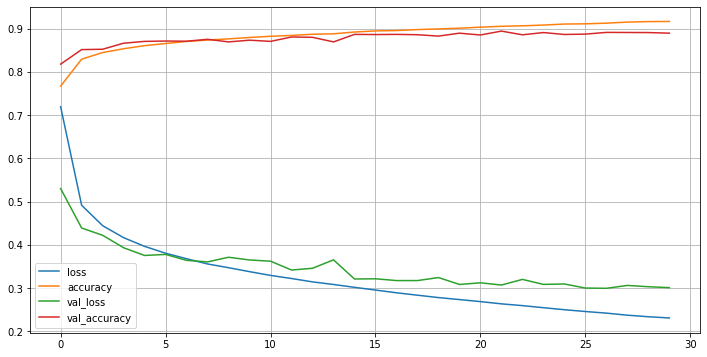

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize = (12,6))
plt.grid(True)
plt.show()

In [31]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 63.0544 - accuracy: 0.8399


[63.05443572998047, 0.839900016784668]

In [34]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(3)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [36]:
# y_pred = model.predict_classes(X_new)
# y_pred

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [38]:
# import numpy as np
# np.array(class_names)[y_pred]

NameError: name 'y_pred' is not defined

In [39]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

## Building a Regression MLP Using the Sequential API

In [130]:
from sklearn.datasets import fetch_california_housing 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [131]:
scaler = StandardScaler()

In [132]:
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test) 

In [133]:
X_train.shape[1:]

(8,)

In [134]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'relu', input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [135]:
model.compile(loss = "mean_squared_error", optimizer = 'sgd')

In [136]:
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances 
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 915us/step - loss: nan - val_loss: nan
Epoch 2/20
363/363 [==============================] - 0s 710us/step - loss: nan - val_loss: nan
Epoch 3/20
363/363 [==============================] - 0s 750us/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 [==============================] - 0s 765us/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 0s 738us/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 0s 725us/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 0s 720us/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 0s 731us/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 0s 727us/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 0s 728us/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 [==================

In [137]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

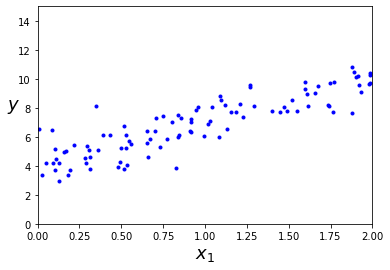

In [138]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [139]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, shuffle = True, train_size = 0.8, test_size = 0.2)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [140]:
scaler = StandardScaler()

In [141]:
X_train_scled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test) 

In [142]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'relu', input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [150]:
model.compile(loss = "mean_squared_error", optimizer = 'sgd', metrics = ["mse"])

In [151]:
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:12] # pretend these are new instances 
y_pred = model.predict(X_new)

Epoch 1/20
2/2 [==============================] - 0s 83ms/step - loss: 1.1262 - mse: 1.1262 - val_loss: 0.6066 - val_mse: 0.6066
Epoch 2/20
2/2 [==============================] - 0s 18ms/step - loss: 1.1292 - mse: 1.1292 - val_loss: 0.6069 - val_mse: 0.6069
Epoch 3/20
2/2 [==============================] - 0s 19ms/step - loss: 1.1519 - mse: 1.1519 - val_loss: 0.5824 - val_mse: 0.5824
Epoch 4/20
2/2 [==============================] - 0s 18ms/step - loss: 1.1169 - mse: 1.1169 - val_loss: 0.5795 - val_mse: 0.5795
Epoch 5/20
2/2 [==============================] - 0s 18ms/step - loss: 1.1091 - mse: 1.1091 - val_loss: 0.5796 - val_mse: 0.5796
Epoch 6/20
2/2 [==============================] - 0s 19ms/step - loss: 1.1039 - mse: 1.1039 - val_loss: 0.5803 - val_mse: 0.5803
Epoch 7/20
2/2 [==============================] - 0s 19ms/step - loss: 1.1020 - mse: 1.1020 - val_loss: 0.5808 - val_mse: 0.5808
Epoch 8/20
2/2 [==============================] - 0s 19ms/step - loss: 1.0973 - mse: 1.0973 - val

(0.0, 2.0, 0.0, 15.0)

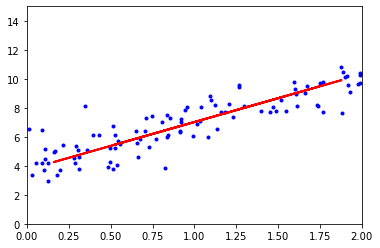

In [152]:
plt.plot(X, y, "b.")
plt.plot(X_new, y_pred, "r-", linewidth=2, label="Predictions")
plt.axis([0, 2, 0, 15])

In [153]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 19ms/step - loss: 1.0557 - mse: 1.0557


[1.0556957721710205, 1.0556957721710205]

In [154]:
history.history

{'loss': [1.1261639595031738,
  1.1291605234146118,
  1.151893973350525,
  1.1169291734695435,
  1.1091469526290894,
  1.1039477586746216,
  1.1020225286483765,
  1.0972778797149658,
  1.0982197523117065,
  1.0970838069915771,
  1.0914334058761597,
  1.1035875082015991,
  1.0856056213378906,
  1.085198998451233,
  1.0862163305282593,
  1.102430820465088,
  1.08236825466156,
  1.0993943214416504,
  1.0792073011398315,
  1.073347806930542],
 'mse': [1.1261639595031738,
  1.1291605234146118,
  1.151893973350525,
  1.1169291734695435,
  1.1091469526290894,
  1.1039477586746216,
  1.1020225286483765,
  1.0972778797149658,
  1.0982197523117065,
  1.0970838069915771,
  1.0914334058761597,
  1.1035875082015991,
  1.0856056213378906,
  1.085198998451233,
  1.0862163305282593,
  1.102430820465088,
  1.08236825466156,
  1.0993943214416504,
  1.0792073011398315,
  1.073347806930542],
 'val_loss': [0.6065658330917358,
  0.6069077253341675,
  0.5824372172355652,
  0.5794818997383118,
  0.57962399721

## Building Complex Models Using the Functional API

In [178]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)
input = keras.layers.Input(shape=X_train.shape[1:]) # First, we need to create an Input object. This is needed because we may have multiple inputs,
hidden1 = keras.layers.Dense(30, activation="relu")(input)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input], outputs=[output])

In [179]:
# example
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
print(input_B.shape)
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
print(hidden1.shape)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
print(hidden2.shape)
concat = keras.layers.concatenate([input_A, hidden2])
print(concat.shape)
output = keras.layers.Dense(1)(concat)
print(output.shape)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

(None, 6)
(None, 30)
(None, 30)
(None, 35)
(None, 1)


In [180]:
model.compile(loss="mse", optimizer="sgd")

In [181]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
print(X_train_B)
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

[[ 5.48473282e+00  1.12595420e+00  7.24000000e+02  2.76335878e+00
   3.40900000e+01 -1.17690000e+02]
 [ 3.52020860e+00  9.94784876e-01  2.81500000e+03  3.67014342e+00
   3.39700000e+01 -1.18190000e+02]
 [ 6.44444444e+00  1.83333333e+00  1.23000000e+02  2.27777778e+00
   3.27500000e+01 -1.15720000e+02]
 ...
 [ 6.66367713e+00  1.06188341e+00  3.48900000e+03  3.12914798e+00
   3.46800000e+01 -1.18110000e+02]
 [ 3.23850085e+00  1.15672913e+00  8.65000000e+02  1.47359455e+00
   3.39800000e+01 -1.18510000e+02]
 [ 3.51396648e+00  1.06424581e+00  1.27600000e+03  3.56424581e+00
   3.40000000e+01 -1.18270000e+02]]


In [182]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 2/20
363/363 [==============================] - 0s 836us/step - loss: nan - val_loss: nan
Epoch 3/20
363/363 [==============================] - 0s 852us/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 [==============================] - 0s 845us/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 0s 839us/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 0s 834us/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 0s 843us/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 0s 831us/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 0s 854us/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 0s 855us/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 [====================

In [183]:
output = keras.layers.Dense(1)(concat)
aux_output = keras.layers.Dense(1)(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                               outputs=[output, aux_output])

In [184]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [185]:
history = model.fit(
        [X_train_A, X_train_B], [y_train, y_train], epochs=20,
        validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: nan - dense_67_loss: nan - dense_68_loss: nan - val_loss: nan - val_dense_67_loss: nan - val_dense_68_loss: nan
Epoch 2/20
363/363 [==============================] - 0s 977us/step - loss: nan - dense_67_loss: nan - dense_68_loss: nan - val_loss: nan - val_dense_67_loss: nan - val_dense_68_loss: nan
Epoch 3/20
363/363 [==============================] - 0s 981us/step - loss: nan - dense_67_loss: nan - dense_68_loss: nan - val_loss: nan - val_dense_67_loss: nan - val_dense_68_loss: nan
Epoch 4/20
363/363 [==============================] - 0s 986us/step - loss: nan - dense_67_loss: nan - dense_68_loss: nan - val_loss: nan - val_dense_67_loss: nan - val_dense_68_loss: nan
Epoch 5/20
363/363 [==============================] - 0s 971us/step - loss: nan - dense_67_loss: nan - dense_68_loss: nan - val_loss: nan - val_dense_67_loss: nan - val_dense_68_loss: nan
Epoch 6/20
363/363 [==============================] - 0s 988us

In [186]:
total_loss, main_loss, aux_loss = model.evaluate(
        [X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 641us/step - loss: nan - dense_67_loss: nan - dense_68_loss: nan


In [187]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])